In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
df = pd.read_excel('/content/dataset.xlsx')

In [ ]:
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [ ]:
df.tail(5)

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
32531,53461,4.750000e+08,Rancasari,2,1.0,1.0,60.0,65.0,10.0,Bandung City,-6.953536,107.675210
32532,53462,7.000000e+09,Bojongloa Kidul,5,5.0,2.0,426.0,500.0,10.0,Bandung City,-6.947036,107.596271
32533,53463,5.500000e+09,Sukasari,5,3.0,2.0,427.0,283.0,10.0,Bandung City,-6.863000,107.588100
32534,53464,3.950000e+09,Regol,4,3.0,2.0,182.0,380.0,10.0,Bandung City,-6.939713,107.613797
32535,53466,1.350000e+09,Buah Batu,3,2.0,1.0,101.0,111.0,10.0,Bandung City,-6.965549,107.637926


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9


In [ ]:
df.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [ ]:
df.shape

(32536, 12)

In [ ]:
df['Price'].describe()

,Price
count,3.253600e+04
mean,2.554932e+09
std,1.879994e+09
min,1.020000e+07
25%,1.200000e+09
50%,2.000000e+09
75%,3.365000e+09
max,9.700000e+09


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
Y = df['Price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(32536, 11) (26028, 11) (6508, 11)


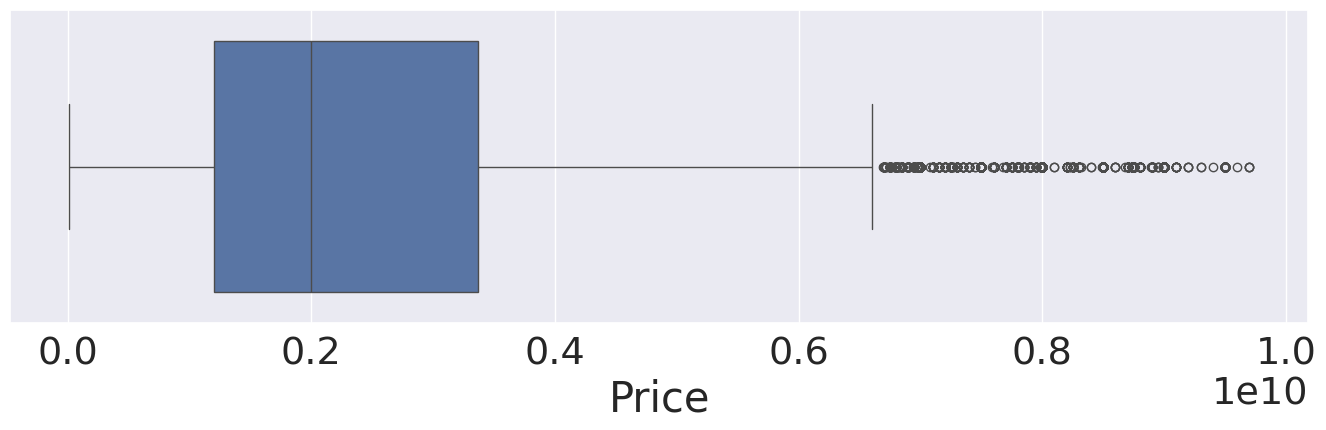

In [ ]:
plt.figure(figsize=(14,5))
sns.boxplot(data = df,x='Price')
plt.tight_layout()

<Axes: >

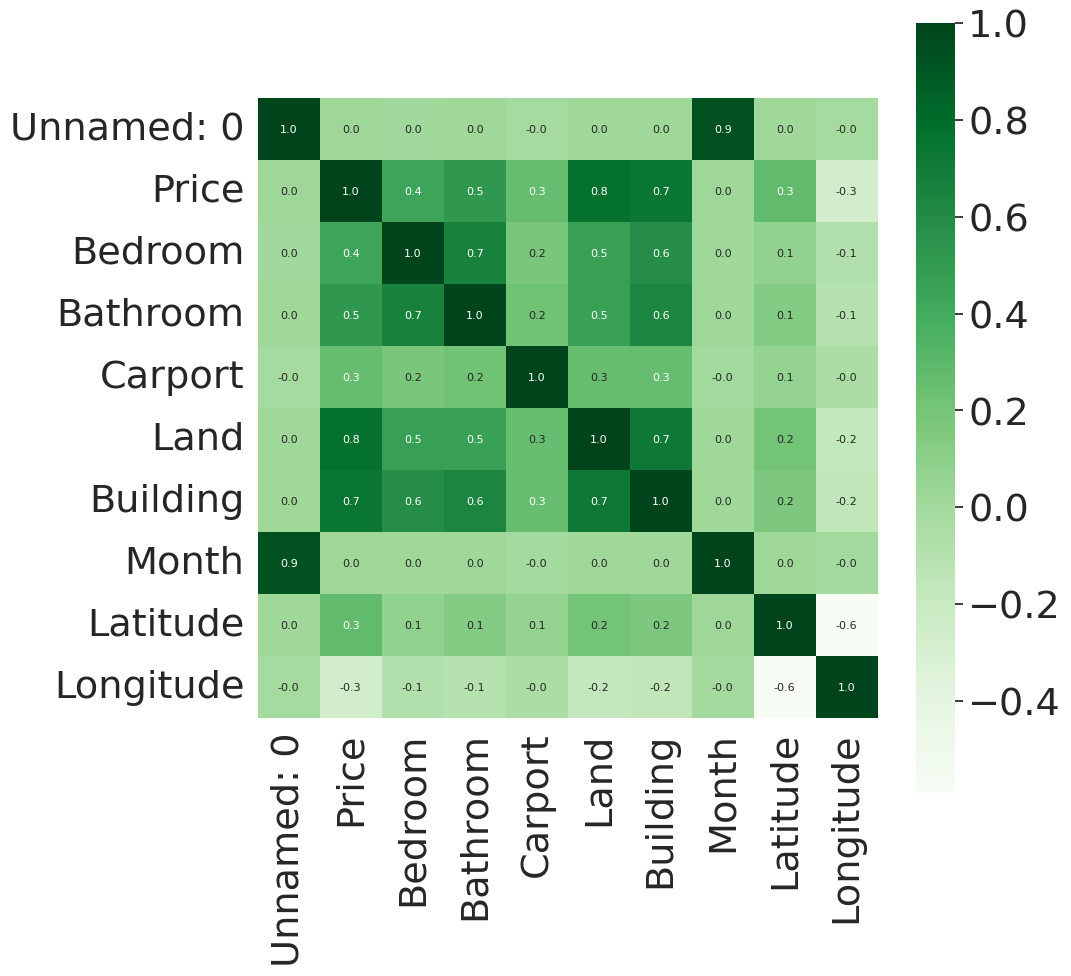

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
df.Price.skew()

1.3792814952348387

In [ ]:
col = df.isna().sum()
col_na = pd.DataFrame({'Column': col.index,'Count':col.values}).sort_values(by='Count',ascending=False)
col_na.head(20)

,Column,Count
4,Bathroom,15
5,Carport,15
10,Latitude,10
2,Location,9
7,Building,9
8,Month,9
9,City/Regency,9
11,Longitude,9
6,Land,3
0,Unnamed: 0,0


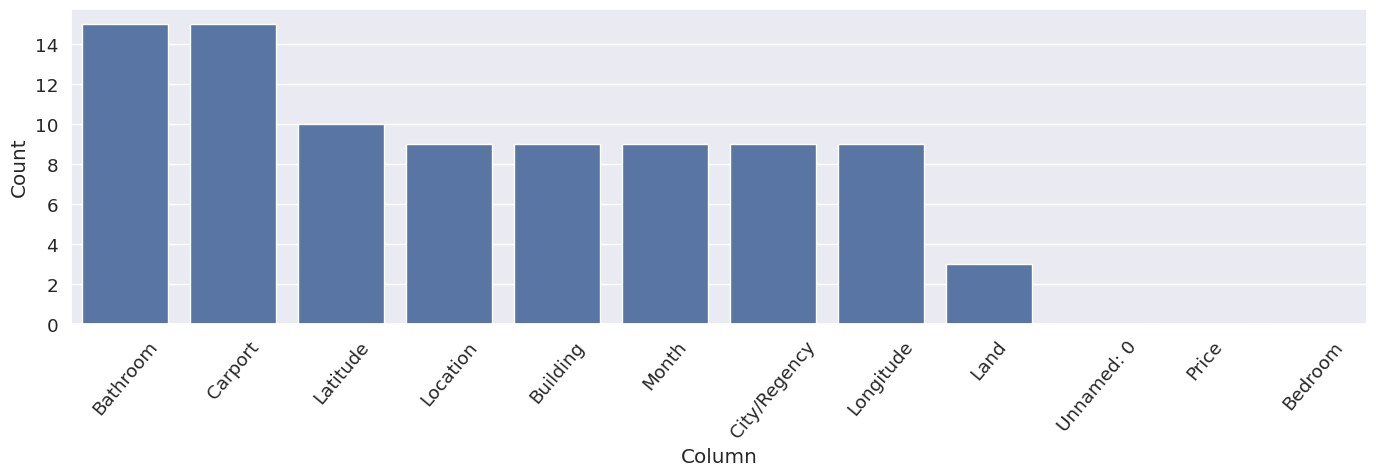

In [ ]:

sns.set(font_scale=1.2)
plt.figure(figsize=(14,5))
sns.barplot(data=col_na.head(40),x='Column',y='Count')
plt.xticks(rotation=50)
plt.tight_layout()

In [ ]:
col_na['Location'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location
4,Bathroom,15,0.046103
5,Carport,15,0.046103
10,Latitude,10,0.030735
2,Location,9,0.027662
7,Building,9,0.027662
8,Month,9,0.027662
9,City/Regency,9,0.027662
11,Longitude,9,0.027662
6,Land,3,0.009221
0,Unnamed: 0,0,0.000000


In [ ]:
col_na['Price'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location,Price
4,Bathroom,15,0.046103,0.046103
5,Carport,15,0.046103,0.046103
10,Latitude,10,0.030735,0.030735
2,Location,9,0.027662,0.027662
7,Building,9,0.027662,0.027662
8,Month,9,0.027662,0.027662
9,City/Regency,9,0.027662,0.027662
11,Longitude,9,0.027662,0.027662
6,Land,3,0.009221,0.009221
0,Unnamed: 0,0,0.000000,0.000000


In [ ]:
col_na['Bedrooms'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location,Price,Bedrooms
4,Bathroom,15,0.046103,0.046103,0.046103
5,Carport,15,0.046103,0.046103,0.046103
10,Latitude,10,0.030735,0.030735,0.030735
2,Location,9,0.027662,0.027662,0.027662
7,Building,9,0.027662,0.027662,0.027662
8,Month,9,0.027662,0.027662,0.027662
9,City/Regency,9,0.027662,0.027662,0.027662
11,Longitude,9,0.027662,0.027662,0.027662
6,Land,3,0.009221,0.009221,0.009221
0,Unnamed: 0,0,0.000000,0.000000,0.000000


In [ ]:
col_na['Bathrooms'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location,Price,Bedrooms,Bathrooms
4,Bathroom,15,0.046103,0.046103,0.046103,0.046103
5,Carport,15,0.046103,0.046103,0.046103,0.046103
10,Latitude,10,0.030735,0.030735,0.030735,0.030735
2,Location,9,0.027662,0.027662,0.027662,0.027662
7,Building,9,0.027662,0.027662,0.027662,0.027662
8,Month,9,0.027662,0.027662,0.027662,0.027662
9,City/Regency,9,0.027662,0.027662,0.027662,0.027662
11,Longitude,9,0.027662,0.027662,0.027662,0.027662
6,Land,3,0.009221,0.009221,0.009221,0.009221
0,Unnamed: 0,0,0.000000,0.000000,0.000000,0.000000


In [ ]:
col_na['Carports'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location,Price,Bedrooms,Bathrooms,Carports
4,Bathroom,15,0.046103,0.046103,0.046103,0.046103,0.046103
5,Carport,15,0.046103,0.046103,0.046103,0.046103,0.046103
10,Latitude,10,0.030735,0.030735,0.030735,0.030735,0.030735
2,Location,9,0.027662,0.027662,0.027662,0.027662,0.027662
7,Building,9,0.027662,0.027662,0.027662,0.027662,0.027662
8,Month,9,0.027662,0.027662,0.027662,0.027662,0.027662
9,City/Regency,9,0.027662,0.027662,0.027662,0.027662,0.027662
11,Longitude,9,0.027662,0.027662,0.027662,0.027662,0.027662
6,Land,3,0.009221,0.009221,0.009221,0.009221,0.009221
0,Unnamed: 0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
col_na['Land size'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location,Price,Bedrooms,Bathrooms,Carports,Land size
4,Bathroom,15,0.046103,0.046103,0.046103,0.046103,0.046103,0.046103
5,Carport,15,0.046103,0.046103,0.046103,0.046103,0.046103,0.046103
10,Latitude,10,0.030735,0.030735,0.030735,0.030735,0.030735,0.030735
2,Location,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
7,Building,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
8,Month,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
9,City/Regency,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
11,Longitude,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
6,Land,3,0.009221,0.009221,0.009221,0.009221,0.009221,0.009221
0,Unnamed: 0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
col_na['Building size'] = (col_na['Count']/df.shape[0])*100
col_na

,Column,Count,Location,Price,Bedrooms,Bathrooms,Carports,Land size,Building size
4,Bathroom,15,0.046103,0.046103,0.046103,0.046103,0.046103,0.046103,0.046103
5,Carport,15,0.046103,0.046103,0.046103,0.046103,0.046103,0.046103,0.046103
10,Latitude,10,0.030735,0.030735,0.030735,0.030735,0.030735,0.030735,0.030735
2,Location,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
7,Building,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
8,Month,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
9,City/Regency,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
11,Longitude,9,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662,0.027662
6,Land,3,0.009221,0.009221,0.009221,0.009221,0.009221,0.009221,0.009221
0,Unnamed: 0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


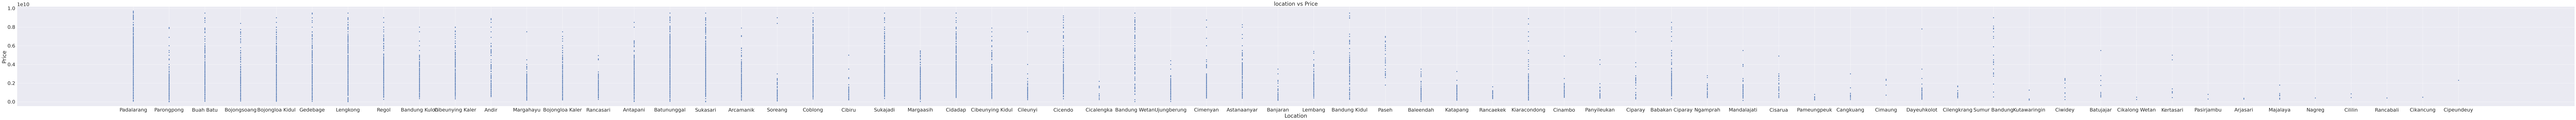

In [ ]:
plt.figure(figsize=(200,10))
sns.set(font_scale=2.5)
sns.scatterplot(data= data, y='Price',x='Location')
plt.title("location vs Price")
plt.tight_layout()
plt.show()

In [ ]:
df['Location']

,Location
0,Padalarang
1,Parongpong
2,Buah Batu
3,Bojongsoang
4,Bojongloa Kidul
...,...
32531,Rancasari
32532,Bojongloa Kidul
32533,Sukasari
32534,Regol


In [ ]:
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [ ]:
print(X,Y)

       Unnamed: 0         Location  Bedroom  Bathroom  Carport   Land  \
0               0       Padalarang        2       1.0      1.0   72.0   
1               1       Parongpong        2       1.0      1.0   70.0   
2               2        Buah Batu        3       2.0      1.0   60.0   
3               3      Bojongsoang        2       3.0      1.0   90.0   
4               4  Bojongloa Kidul        4       4.0      0.0  200.0   
...           ...              ...      ...       ...      ...    ...   
32531       53461        Rancasari        2       1.0      1.0   60.0   
32532       53462  Bojongloa Kidul        5       5.0      2.0  426.0   
32533       53463         Sukasari        5       3.0      2.0  427.0   
32534       53464            Regol        4       3.0      2.0  182.0   
32535       53466        Buah Batu        3       2.0      1.0  101.0   

       Building  Month          City/Regency  Latitude   Longitude  
0          50.0    8.0  West Bandung Regency -6.843600

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

location_encoder = LabelEncoder()
city_encoder = LabelEncoder()


location_encoder.fit(X_train['Location'])
city_encoder.fit(X_train['City/Regency'])

# Transform the categorical columns in the training data
X_train['Location'] = location_encoder.transform(X_train['Location'])
X_train['City/Regency'] = city_encoder.transform(X_train['City/Regency'])


# load the model
model = XGBRegressor()

# Fit the model to your training data
model.fit(X_train, y_train)

training_data_prediction = model.predict(X_train)

In [ ]:
# load the model
model = XGBRegressor()

# Fit the model to your training data
model.fit(X_train, y_train) # Assuming y_train contains the target variable

training_data_prediction = model.predict(X_train)

In [ ]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
 #accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[3.2546112e+09 6.0398582e+09 1.7745614e+09 ... 4.6553917e+09 4.8391660e+09
 3.3934364e+09]


In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9178576042779153
Mean Absolute Error: 368826234.14415246


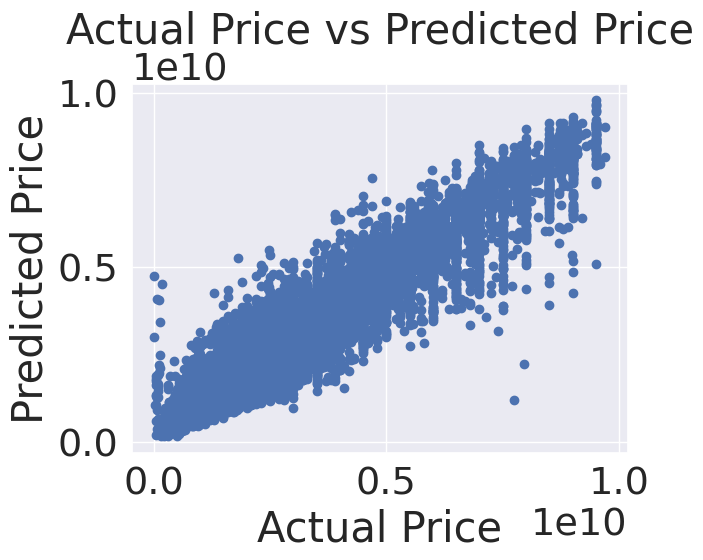

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
import pandas as pd
# Assuming X_test is your DataFrame

# Convert 'Location' and 'City/Regency' to categorical type
for col in ['Location', 'City/Regency']:
    X_test[col] = X_test[col].astype('category')

# Now you can make predictions
test_data_prediction = model.predict(X_test)

In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.8508905708528434
Mean Absolute Error: 485674941.1850031


In [212]:
print(training_data_prediction)

[3.2546112e+09 6.0398582e+09 1.7745614e+09 ... 4.6553917e+09 4.8391660e+09
 3.3934364e+09]
